In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [2]:
data=pd.read_csv("Fraud.csv")

In [3]:
data.shape

(6362620, 11)

In [4]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [5]:
data.isnull().sum()

step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64

In [6]:
data.duplicated().sum()

np.int64(0)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [8]:
data['differenceOrig'] = data['newbalanceOrig'] - data['oldbalanceOrg']
data['differenceDest'] = data['newbalanceDest'] - data['oldbalanceDest']

In [9]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,differenceOrig,differenceDest
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0


In [10]:
data['highValueFlag'] = data['amount'] > 200000

In [11]:
data.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,differenceOrig,differenceDest,highValueFlag
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0,False
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0,False
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0,False
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0,False
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0,False


In [12]:
data['timeOfDay'] = pd.cut(data['step'], bins=[0, 8, 16, 24], labels=['Night', 'Day', 'Evening'], right=False)

Text(0, 0.5, 'Count')

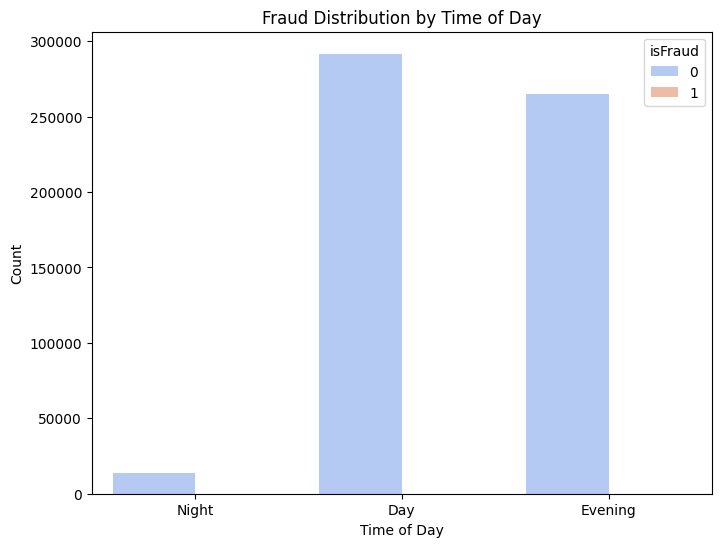

In [13]:
plt.figure(figsize=(8, 6))
sns.countplot(x='timeOfDay', hue='isFraud', data=data, palette='coolwarm')
plt.title('Fraud Distribution by Time of Day')
plt.xlabel('Time of Day')
plt.ylabel('Count')

In [14]:
data = pd.get_dummies(data, columns=['type', 'timeOfDay'], drop_first=True)

In [15]:
data.head()

,step,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,differenceOrig,differenceDest,highValueFlag,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,timeOfDay_Day,timeOfDay_Evening
0,1,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0,-9839.64,0.0,False,False,False,True,False,False,False
1,1,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0,-1864.28,0.0,False,False,False,True,False,False,False
2,1,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0,-181.00,0.0,False,False,False,False,True,False,False
3,1,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0,-181.00,-21182.0,False,True,False,False,False,False,False
4,1,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0,-11668.14,0.0,False,False,False,True,False,False,False


In [16]:
data = data.drop(columns=['nameOrig', 'nameDest'])

In [17]:
data.head()

,step,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,differenceOrig,differenceDest,highValueFlag,type_CASH_OUT,type_DEBIT,type_PAYMENT,type_TRANSFER,timeOfDay_Day,timeOfDay_Evening
0,1,9839.64,170136.0,160296.36,0.0,0.0,0,0,-9839.64,0.0,False,False,False,True,False,False,False
1,1,1864.28,21249.0,19384.72,0.0,0.0,0,0,-1864.28,0.0,False,False,False,True,False,False,False
2,1,181.00,181.0,0.00,0.0,0.0,1,0,-181.00,0.0,False,False,False,False,True,False,False
3,1,181.00,181.0,0.00,21182.0,0.0,1,0,-181.00,-21182.0,False,True,False,False,False,False,False
4,1,11668.14,41554.0,29885.86,0.0,0.0,0,0,-11668.14,0.0,False,False,False,True,False,False,False


Text(0.5, 1.0, 'Correlation Heatmap of Features')

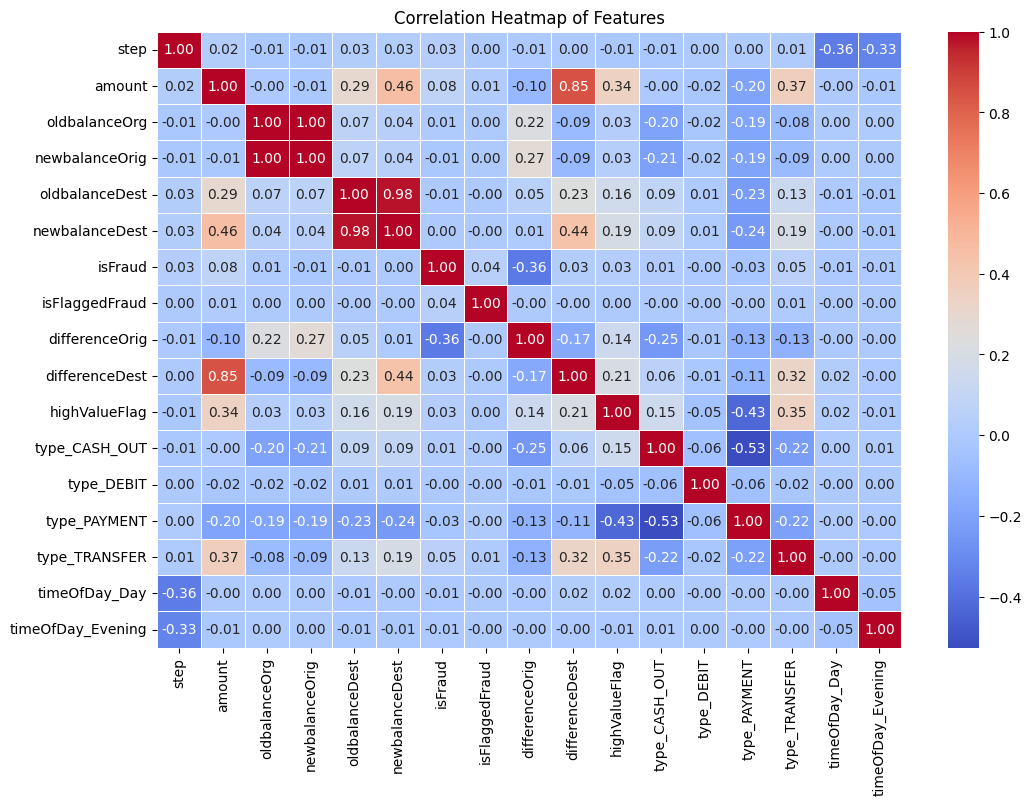

In [18]:
plt.figure(figsize=(12, 8))
correlation_matrix = data.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Correlation Heatmap of Features')

In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [20]:
fraud = data[data['isFraud'] == 1] 
non_fraud = data[data['isFraud'] == 0].sample(n=len(fraud), random_state=42) 

balanced_data = pd.concat([fraud, non_fraud])

In [21]:
X_balanced = balanced_data.drop(columns=['isFraud', 'isFlaggedFraud'])
y_balanced = balanced_data['isFraud']

In [22]:
X_train_bal, X_val_bal, y_train_bal, y_val_bal = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [23]:
rf_model = RandomForestClassifier(n_estimators=50, random_state=42)

rf_model.fit(X_train_bal, y_train_bal)

y_pred_bal = rf_model.predict(X_val_bal)

In [25]:
print("Accuracy:", accuracy_score(y_val_bal, y_pred_bal))
print("\nClassification Report:\n", classification_report(y_val_bal, y_pred_bal))

print("\nConfusion Matrix:")
print(confusion_matrix(y_val_bal, y_pred_bal))

Accuracy: 0.9905660377358491

Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1637
           1       0.99      0.99      0.99      1649

    accuracy                           0.99      3286
   macro avg       0.99      0.99      0.99      3286
weighted avg       0.99      0.99      0.99      3286


Confusion Matrix:
[[1619   18]
 [  13 1636]]
